#### Steps follwed here are:
##### 1) Reading and Understanding the Data
##### 2) Data Preparation
##### 3) Performing EDA
##### 4) Creating dummy variables
##### 5) Splitting the Data into Training and Testing Sets
##### 6) Training the model
##### 7) Residual Analysis
##### 8) Predictions and Evaluations on the test data

### Step 1: Reading and Understanding the Data

In [975]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [976]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [977]:
#Read data
day = pd.read_csv("Desktop/day.csv")

In [978]:
# Check the head of the dataset
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###### Inspect the various aspects of the housing dataframe

In [979]:
day.shape

(730, 16)

In [980]:
#checking for datatypes of columns
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [981]:
#Get basic idea of data using describe()
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [982]:
#checking for null values in dataset
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Step2: Data Preparation

In [983]:
#instant is an index column so we can drop it
day.drop(['instant'],axis=1,inplace=True)

In [984]:
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [985]:
#column dteday and yr, month are having same data so we can drop dteday
day.drop(['dteday'],axis=1,inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [986]:
# here in the data set casual+registered=cnt. so we can drop casual,registered columns
day.drop(['casual','registered'],axis=1,inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [987]:
#We can observe in the dataset that some of the variables like 'weathersit','weekday','season','yr' have values as 1, 2, 3, 4 which have specific labels associated with them.
#So,convert such feature values into categorical values.
#Replace season,weekday and weathersit with appropriate values
day['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
day['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
day['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [988]:
#changing datatypes of numerical columns to appropriate types
day[['temp','atemp','hum','windspeed','cnt']]=day[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [989]:
#Convert variables to object type
day['season']=day['season'].astype(object)
day['mnth']=day['mnth'].astype(object)
day['weathersit']=day['weathersit'].astype(object)
day['weekday']=day['weekday'].astype(object)

### step3: Performing EDA

##### Visualising Numeric Variables.

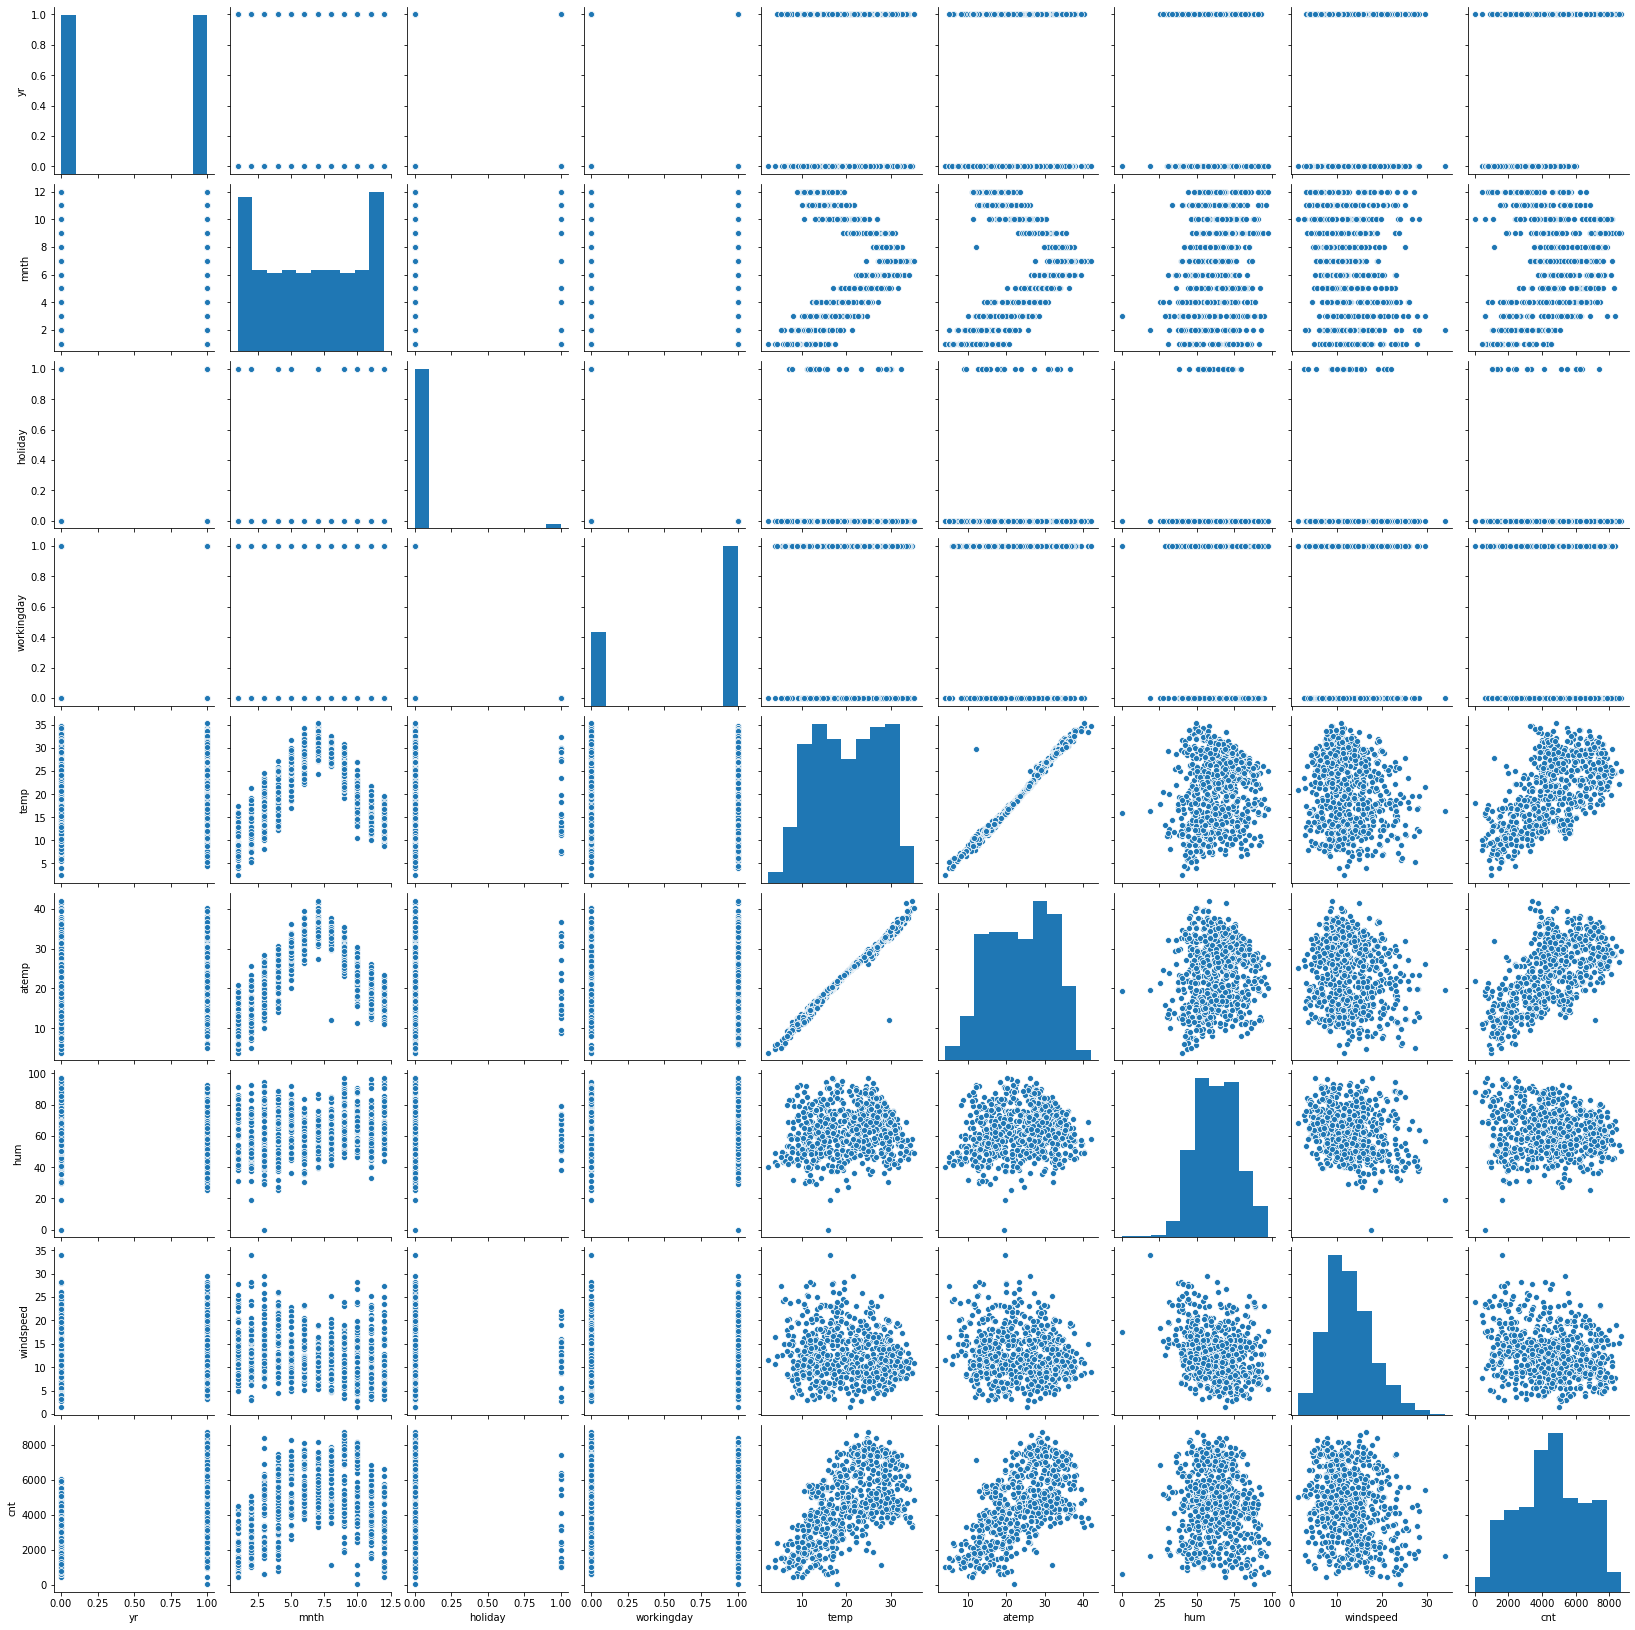

In [990]:
#Let's make a pairplot of all the numeric variables
sns.pairplot(day)
plt.show()

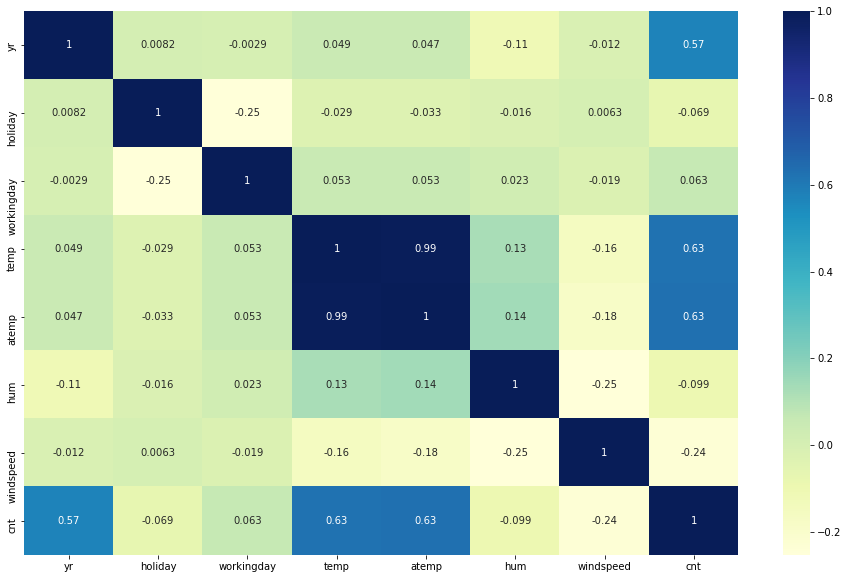

In [991]:
#let check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [992]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp
day.drop(['temp'],axis=1,inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


##### Visualising categorical Variables

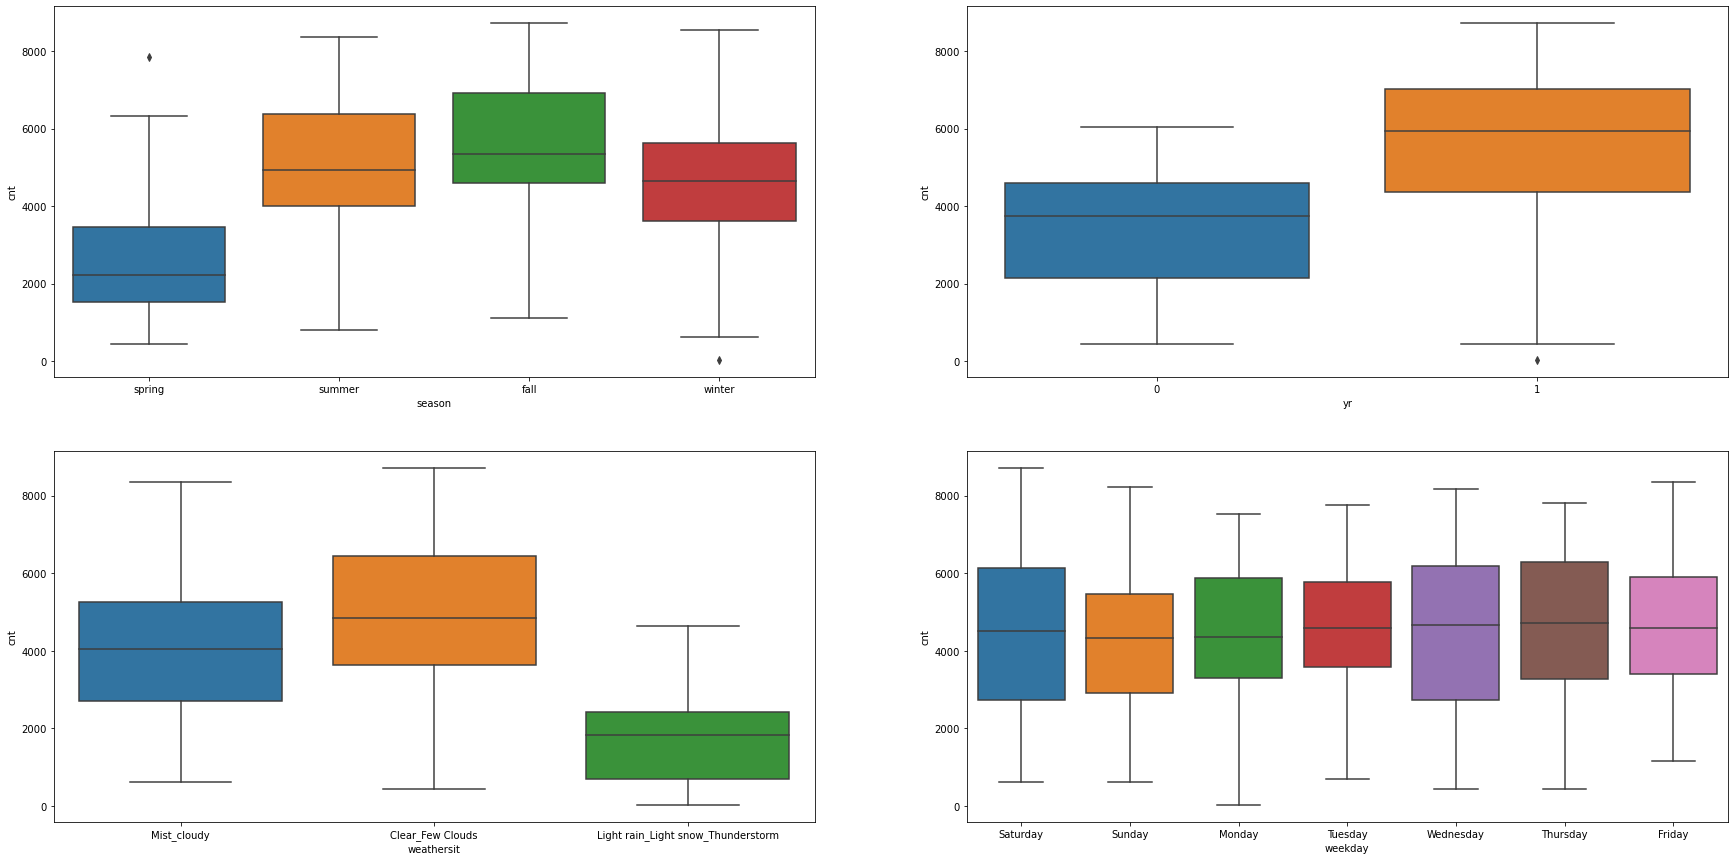

In [993]:
# 'yr','mnth','workingday','weathersit','weekday','season'
plt.figure(figsize=(30, 15))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = day)
plt.subplot(2,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(2,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)

In [994]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


### Step4: Creating dummy variables

In [995]:
# Creating dummy variables for categorical data

season_dum =pd.get_dummies(day['season'],drop_first=True)
mnth_dum =pd.get_dummies(day['mnth'],drop_first=True)
weekday_dum =pd.get_dummies(day['weekday'],drop_first=True)
weathersit_dum =pd.get_dummies(day['weathersit'],drop_first=True)

In [996]:
# Add the results to the original day dataframe
day=pd.concat([day,season_dum],axis=1)
day=pd.concat([day,mnth_dum],axis=1)
day=pd.concat([day,weekday_dum],axis=1)
day=pd.concat([day,weathersit_dum],axis=1)

In [997]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [998]:
#Deleting the orginal columns season,weathersit,weekday,mnth
day.drop(['season'],axis=1,inplace=True)
day.drop(['weathersit'],axis=1,inplace=True)
day.drop(['weekday'],axis=1,inplace=True)
day.drop(['mnth'],axis=1,inplace=True)
day.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Step5: Splitting the Data into Training and Testing Sets

##### The first basic step for regression is performing a train-test split.

In [999]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
day_train, day_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

##### Scaling the numerical data

In [1000]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1001]:
# Apply scaler() to all the numerical columns 
num_vars=['atemp','hum','windspeed','cnt']
day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

In [1002]:
day_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light rain_Light snow_Thunderstorm,Mist_cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,1,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


##### Dividing day_train into X_train and y_train sets for the model building

In [1003]:
y_train = day_train.pop('cnt')
X_train = day_train

### Step6: Training the model

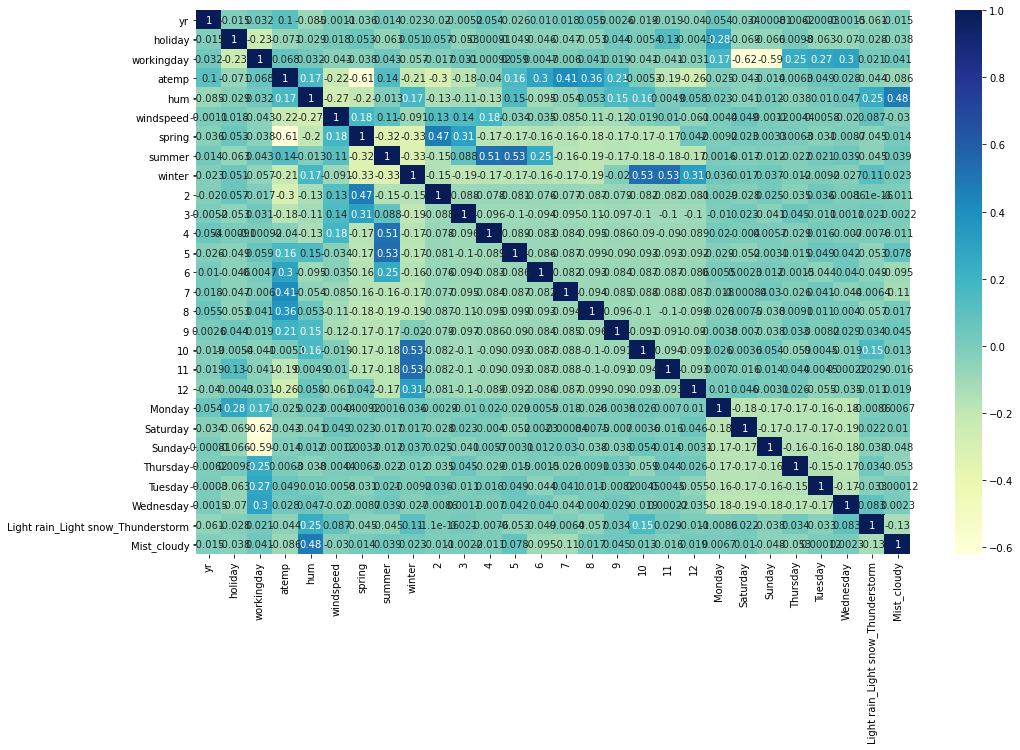

In [1004]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(day_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [1005]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

##### Adding all the variables to the model

In [1006]:
day.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
                                          2,
                                          3,
                                          4,
                                          5,
                                          6,
                                          7,
                                          8,
                                          9,
                                         10,
                                         11,
                                         12,
                                   'Monday',
          

In [1007]:
import statsmodels.api as sm

In [1008]:
#bulinding the model with all the variables
X_train_sm = sm.add_constant(X_train)

#create model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     101.9
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          4.12e-180
Time:                        15:42:51   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -991.7
Df Residuals:                     482   BIC:                            -873.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2029      0.034      6.029      0.000       0.137       0.269
yr                                     0.2342      0.008     28.937      0.000       0.218       0.250
holiday                                0.0066      0.024      0.280      0.780      -0.040       0.053
workingday                             0.0865      0.012      7.132      0.000       0.063       0.110
atemp                                  0.4195      0.045      9.248      0.000       0.330       0.509
hum                                   -0.1456      0.039     -3.758      0.000      -0.222      -0.069
windspeed                             -0.1686      0.026     -6.506      0.000      -0.219      -0.118
spring                                -0.0551      0.030     -1.826      0.068      -0.114       0.004
summer                                 0.0308      0.026      1.171      0.242      -0.021       0.083
winter                                 0.0998      0.028      3.553      0.000       0.045       0.155
2                                      0.0329      0.021      1.588      0.113      -0.008       0.074
3                                      0.0728      0.022      3.266      0.001       0.029       0.117
4                                      0.0734      0.034      2.187      0.029       0.007       0.139
5                                      0.1093      0.036      3.071      0.002       0.039       0.179
6                                      0.0912      0.038      2.410      0.016       0.017       0.166
7                                      0.0533      0.043      1.238      0.216      -0.031       0.138
8                                      0.1103      0.041      2.708      0.007       0.030       0.190
9                                      0.1649      0.037      4.453      0.000       0.092       0.238
10                                     0.0812      0.034      2.357      0.019       0.014       0.149
11                                     0.0258      0.033      0.780      0.436      -0.039       0.091
12                                     0.0194      0.027      0.727      0.468      -0.033       0.072
Monday                                -0.0263      0.015     -1.707      0.089      -0.057       0.004
Saturday                               0.0823      0.014      6.041      0.000       0.056       0.109
Sunday                                 0.0276      0.014      1.966      0.050     8.6e-06       0.055
Thursday                              -0.0132      0.016     -0.843      0.399      -0.044       0.018
Tuesday                               -0.0222      0.016     -1.418      0.157      -0.053       0.009
Wednesday                             -0.0081      0.015     -0.540      0.589      -0.038      

###### Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

###### Maybe we could drop some?

###### We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

#### Checking VIF
###### Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. 

In [1009]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1010]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,77.32
21,Saturday,17.84
22,Sunday,16.87
6,spring,10.74
8,winter,9.47
15,8,9.26
14,7,8.40
7,summer,8.23
16,9,6.51
13,6,6.35


##### Variable Selection using RFE

In [1011]:
# Importing RFE and Linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1012]:
 # Running RFE with output no of variables equal to 15.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [1013]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 (2, False, 5),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 6),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 8),
 (12, False, 9),
 ('Monday', False, 11),
 ('Saturday', False, 3),
 ('Sunday', False, 10),
 ('Thursday', False, 13),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1)]

In [1014]:
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9,
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy'],
      dtype='object')

In [1015]:
X_train.columns[~rfe.support_]

Index(['workingday',     'summer',            2,            7,           10,
                 11,           12,     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday'],
      dtype='object')

In [1016]:
X_train_rfe = X_train[col]

In [1017]:
# Now build the remaining model by using STATSMODEL
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [1018]:
lm = sm.OLS(y_train,X_train_rfe1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          8.06e-186
Time:                        15:42:52   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2995      0.034      8.909      0.000       0.233       0.366
yr                                     0.2320      0.008     28.268      0.000       0.216       0.248
holiday                               -0.0845      0.026     -3.266      0.001      -0.135      -0.034
atemp                                  0.4597      0.033     13.757      0.000       0.394       0.525
hum                                   -0.1599      0.038     -4.156      0.000      -0.236      -0.084
windspeed                             -0.1613      0.026     -6.170      0.000      -0.213      -0.110
spring                                -0.0757      0.019     -4.061      0.000      -0.112      -0.039
winter                                 0.1024      0.016      6.301      0.000       0.070       0.134
3                                      0.0585      0.015      3.852      0.000       0.029       0.088
4                                      0.0591      0.020      2.948      0.003       0.020       0.099
5                                      0.0922      0.019      4.906      0.000       0.055       0.129
6                                      0.0583      0.019      3.017      0.003       0.020       0.096
8                                      0.0608      0.018      3.362      0.001       0.025       0.096
9                                      0.1175      0.017      6.719      0.000       0.083       0.152
Light rain_Light snow_Thunderstorm    -0.2359      0.027     -8.833      0.000      -0.288      -0.183
Mist_cloudy                           -0.0568      0.011     -5.347      0.000      -0.078      -0.036
==============================================================================
Omnibus:                       60.719   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.007
Skew:                          -0.591   Prob(JB):                     6.62e-36
Kurtosis:                       5.496   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1019]:
# Check VIF also
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
14,Mist_cloudy,2.26
0,yr,2.08
11,8,1.90
9,5,1.77
8,4,1.68


In [1020]:
#Column 'hum' has very high VIF. So drop it
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

##### Building first model using STATSMODEL

In [1021]:
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          2.75e-183
Time:                        15:42:53   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2151      0.027      7.900      0.000       0.162       0.269
yr                                     0.2355      0.008     28.377      0.000       0.219       0.252
holiday                               -0.0854      0.026     -3.248      0.001      -0.137      -0.034
atemp                                  0.4298      0.033     12.960      0.000       0.365       0.495
windspeed                             -0.1332      0.026     -5.189      0.000      -0.184      -0.083
spring                                -0.0815      0.019     -4.310      0.000      -0.119      -0.044
winter                                 0.0911      0.016      5.597      0.000       0.059       0.123
3                                      0.0597      0.015      3.871      0.000       0.029       0.090
4                                      0.0597      0.020      2.930      0.004       0.020       0.100
5                                      0.0817      0.019      4.316      0.000       0.045       0.119
6                                      0.0628      0.020      3.199      0.001       0.024       0.101
8                                      0.0594      0.018      3.235      0.001       0.023       0.096
9                                      0.1118      0.018      6.311      0.000       0.077       0.147
Light rain_Light snow_Thunderstorm    -0.2799      0.025    -11.234      0.000      -0.329      -0.231
Mist_cloudy                           -0.0820      0.009     -9.252      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       61.552   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.196
Skew:                          -0.618   Prob(JB):                     1.99e-34
Kurtosis:                       5.404   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1022]:
# Check VIF also
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,yr,2.08
5,winter,1.97
10,8,1.86
9,6,1.64
8,5,1.60
13,Mist_cloudy,1.55
7,4,1.54


##### Building 2nd model using STATSMODEL

In [1023]:
#Column 'atemp' has VIF>2. So drop it
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [1024]:
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe1).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          3.90e-153
Time:                        15:42:53   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5082      0.018     28.983      0.000       0.474       0.543
yr                                     0.2479      0.010     26.013      0.000       0.229       0.267
holiday                               -0.0886      0.030     -2.916      0.004      -0.148      -0.029
windspeed                             -0.1645      0.030     -5.566      0.000      -0.223      -0.106
spring                                -0.2392      0.017    -14.308      0.000      -0.272      -0.206
winter                                -0.0080      0.017     -0.482      0.630      -0.041       0.025
3                                      0.0494      0.018      2.772      0.006       0.014       0.084
4                                     -0.0153      0.023     -0.676      0.499      -0.060       0.029
5                                      0.0671      0.022      3.072      0.002       0.024       0.110
6                                      0.0901      0.023      3.995      0.000       0.046       0.134
8                                      0.0929      0.021      4.418      0.000       0.052       0.134
9                                      0.1318      0.020      6.456      0.000       0.092       0.172
Light rain_Light snow_Thunderstorm    -0.2896      0.029    -10.056      0.000      -0.346      -0.233
Mist_cloudy                           -0.0943      0.010     -9.257      0.000      -0.114      -0.074
==============================================================================
Omnibus:                       35.107   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.924
Skew:                          -0.372   Prob(JB):                     7.28e-18
Kurtosis:                       4.777   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1025]:
# Check VIF also
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,spring,2.10
0,yr,1.90
4,winter,1.80
12,Mist_cloudy,1.54
6,4,1.48
7,5,1.32
5,3,1.31
9,8,1.31
8,6,1.24


##### Building 3rd model using STATSMODEL

In [1026]:
#Column '4 has high p-value'. So drop it
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [1027]:
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe1).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          3.96e-154
Time:                        15:42:53   Log-Likelihood:                 423.14
No. Observations:                 510   AIC:                            -820.3
Df Residuals:                     497   BIC:                            -765.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.5033      0.016     31.519      0.000       0.472       0.535
yr                                     0.2476      0.010     26.022      0.000       0.229       0.266
holiday                               -0.0886      0.030     -2.918      0.004      -0.148      -0.029
windspeed                             -0.1682      0.029     -5.795      0.000      -0.225      -0.111
spring                                -0.2335      0.014    -16.231      0.000      -0.262      -0.205
winter                                -0.0022      0.014     -0.154      0.878      -0.030       0.026
3                                      0.0522      0.017      3.022      0.003       0.018       0.086
5                                      0.0734      0.020      3.709      0.000       0.035       0.112
6                                      0.0963      0.021      4.675      0.000       0.056       0.137
8                                      0.0990      0.019      5.220      0.000       0.062       0.136
9                                      0.1365      0.019      7.131      0.000       0.099       0.174
Light rain_Light snow_Thunderstorm    -0.2890      0.029    -10.046      0.000      -0.346      -0.232
Mist_cloudy                           -0.0945      0.010     -9.294      0.000      -0.115      -0.075
==============================================================================
Omnibus:                       33.869   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.120
Skew:                          -0.362   Prob(JB):                     4.87e-17
Kurtosis:                       4.735   Cond. No.                         9.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1028]:
# Check VIF also
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.05
0,yr,1.84
3,spring,1.81
4,winter,1.56
11,Mist_cloudy,1.52
5,3,1.28
6,5,1.22
8,8,1.22
7,6,1.16
9,9,1.13


##### Building 4th model using STATSMODEL

In [1029]:
#Column 'windspeed' has VIF>2. So drop it
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [1030]:
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe1).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.4
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          3.31e-148
Time:                        15:42:54   Log-Likelihood:                 406.47
No. Observations:                 510   AIC:                            -788.9
Df Residuals:                     498   BIC:                            -738.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4460      0.013     34.464      0.000       0.421       0.471
yr                                     0.2470      0.010     25.147      0.000       0.228       0.266
holiday                               -0.0921      0.031     -2.938      0.003      -0.154      -0.031
spring                                -0.2372      0.015    -15.991      0.000      -0.266      -0.208
winter                                 0.0059      0.015      0.406      0.685      -0.023       0.035
3                                      0.0465      0.018      2.608      0.009       0.011       0.081
5                                      0.0800      0.020      3.925      0.000       0.040       0.120
6                                      0.1034      0.021      4.874      0.000       0.062       0.145
8                                      0.1123      0.019      5.778      0.000       0.074       0.151
9                                      0.1509      0.020      7.702      0.000       0.112       0.189
Light rain_Light snow_Thunderstorm    -0.3046      0.030    -10.304      0.000      -0.363      -0.247
Mist_cloudy                           -0.0940      0.010     -8.956      0.000      -0.115      -0.073
==============================================================================
Omnibus:                       41.247   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.882
Skew:                          -0.378   Prob(JB):                     5.07e-25
Kurtosis:                       5.167   Cond. No.                         8.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1031]:
# Check VIF also
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.69
10,Mist_cloudy,1.49
2,spring,1.45
3,winter,1.35
4,3,1.23
7,8,1.15
5,5,1.13
8,9,1.11
6,6,1.07
9,Light rain_Light snow_Thunderstorm,1.06


##### Building 5th model using STATSMODEL

In [1032]:
#Column 'winter' has high p-value'. So drop it
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [1033]:
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe1).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          2.76e-149
Time:                        15:42:54   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4493      0.010     44.546      0.000       0.429       0.469
yr                                     0.2469      0.010     25.167      0.000       0.228       0.266
holiday                               -0.0916      0.031     -2.928      0.004      -0.153      -0.030
spring                                -0.2402      0.013    -18.666      0.000      -0.265      -0.215
3                                      0.0450      0.017      2.581      0.010       0.011       0.079
5                                      0.0767      0.019      4.119      0.000       0.040       0.113
6                                      0.1002      0.020      5.108      0.000       0.062       0.139
8                                      0.1090      0.018      6.186      0.000       0.074       0.144
9                                      0.1488      0.019      7.881      0.000       0.112       0.186
Light rain_Light snow_Thunderstorm    -0.3039      0.029    -10.308      0.000      -0.362      -0.246
Mist_cloudy                           -0.0938      0.010     -8.956      0.000      -0.114      -0.073
==============================================================================
Omnibus:                       40.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.374
Skew:                          -0.375   Prob(JB):                     1.08e-24
Kurtosis:                       5.152   Cond. No.                         8.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1034]:
# Check VIF also
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,yr,1.51
2,spring,1.39
9,Mist_cloudy,1.36
3,3,1.22
6,8,1.12
4,5,1.10
7,9,1.10
5,6,1.06
1,holiday,1.03
8,Light rain_Light snow_Thunderstorm,1.02


In [1036]:
#Adding summer to see model improves
X_train_rfe['summer']=X_train['summer']
X_train_rfe.head()

,yr,holiday,spring,3,5,6,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy,summer
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,1,1,0,0,0,0,0,1,0
728,1,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0,0,0,0,0,0,1,1


In [1037]:
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe1).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     151.8
Date:                Mon, 04 Jan 2021   Prob (F-statistic):          3.41e-151
Time:                        15:45:04   Log-Likelihood:                 413.55
No. Observations:                 510   AIC:                            -803.1
Df Residuals:                     498   BIC:                            -752.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.4628      0.011     43.729      0.000       0.442       0.484
yr                                     0.2480      0.010     25.602      0.000       0.229       0.267
holiday                               -0.0917      0.031     -2.967      0.003      -0.152      -0.031
spring                                -0.2600      0.014    -18.916      0.000      -0.287      -0.233
3                                      0.0647      0.018      3.595      0.000       0.029       0.100
5                                      0.1217      0.022      5.553      0.000       0.079       0.165
6                                      0.1236      0.020      6.079      0.000       0.084       0.164
8                                      0.0941      0.018      5.274      0.000       0.059       0.129
9                                      0.1341      0.019      7.040      0.000       0.097       0.171
Light rain_Light snow_Thunderstorm    -0.3078      0.029    -10.572      0.000      -0.365      -0.251
Mist_cloudy                           -0.0918      0.010     -8.871      0.000      -0.112      -0.071
summer                                -0.0600      0.016     -3.768      0.000      -0.091      -0.029
==============================================================================
Omnibus:                       46.383   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.374
Skew:                          -0.421   Prob(JB):                     2.97e-29
Kurtosis:                       5.340   Cond. No.                         8.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1038]:
# Check VIF also
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,summer,2.37
4,5,1.74
0,yr,1.59
2,spring,1.49
9,Mist_cloudy,1.41
3,3,1.36
5,6,1.27
6,8,1.14
7,9,1.12
1,holiday,1.03


##### Model5 (lm5) has all variables p-value and VIF value are in the range and has good R-squared value. stop here

### Step7: Residual Analysis of the train data

In [895]:
y_train_pred = lm5.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

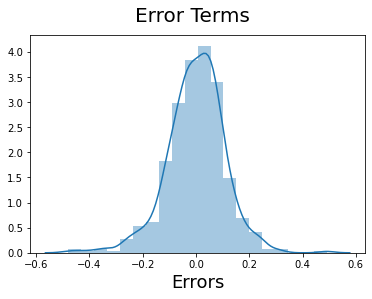

In [896]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [897]:
#Checking columns
X_train_rfe1.head()

,const,yr,holiday,spring,3,5,6,8,9,Light rain_Light snow_Thunderstorm,Mist_cloudy
653,1.0,1,0,0,0,0,0,0,0,0,0
576,1.0,1,0,0,0,0,0,0,0,0,0
426,1.0,1,0,1,1,0,0,0,0,0,1
728,1.0,1,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0,0,0,0,0,0,0,1


### Step8: Making Predictions and Evaluations Using the Final Model

In [898]:
#Applying the scaling on the test sets
num_vars=['atemp','hum','windspeed','cnt']
day_test[num_vars] = scaler.transform(day_test[num_vars])

In [899]:
#Creating X_test and y_test sets
y_test = day_test.pop('cnt')
X_test = day_test

In [900]:
# Adding constant variable to test dataframe
X_test_new = sm.add_constant(X_test)

In [901]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   const                               219 non-null    float64
 1   yr                                  219 non-null    int64  
 2   holiday                             219 non-null    int64  
 3   workingday                          219 non-null    int64  
 4   atemp                               219 non-null    float64
 5   hum                                 219 non-null    float64
 6   windspeed                           219 non-null    float64
 7   spring                              219 non-null    uint8  
 8   summer                              219 non-null    uint8  
 9   winter                              219 non-null    uint8  
 10  2                                   219 non-null    uint8  
 11  3                                   219 non-

In [902]:
# Creating X_test_new dataframe by dropping variables from X_test_new

X_test_new = X_test_new.drop(["workingday", "atemp", "hum","windspeed","summer","winter",2,4,7,10,11,12], axis = 1)

In [904]:
X_test_new = X_test_new.drop(["Monday", "Saturday", "Sunday","Thursday","Tuesday","Wednesday"], axis = 1)

In [905]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   const                               219 non-null    float64
 1   yr                                  219 non-null    int64  
 2   holiday                             219 non-null    int64  
 3   spring                              219 non-null    uint8  
 4   3                                   219 non-null    uint8  
 5   5                                   219 non-null    uint8  
 6   6                                   219 non-null    uint8  
 7   8                                   219 non-null    uint8  
 8   9                                   219 non-null    uint8  
 9   Light rain_Light snow_Thunderstorm  219 non-null    uint8  
 10  Mist_cloudy                         219 non-null    uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usa

In [908]:
# Making predictions using the model on test data

y_pred = lm5.predict(X_test_new)

#### Model Evaluation

##### Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

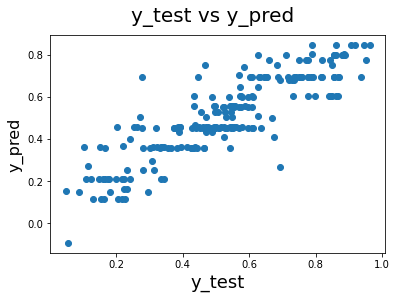

In [909]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

##### We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [910]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7454425326962867

##### R square of our model is 74.54

### We can see that the equation of our best fitted line is:

#### cnt = 0.2469 X yr - 0.0916 X holiday - 0.2402X Spring - 0.3039 X Light rain_Light snow_Thunderstorm - 0.0938 X Mist_Cloudy +0.045 X 3 + 0.0767 X 5 +0.1002 X 6 +0.1090 X 8 + 0.1488 X 9 

### Demand for bikes depends mainly on below variables:
##### yr , holiday ,Spring,  Light rain_Light snow_Thunderstorm,Mist_Cloudy,3 ,5 ,6, 8, 9

### Demands increases in the month of 3, 5, 6, 8 ,9  and yr
### Demand decreases if it is holiday , Spring, Light rain_Light snow_Thunderstorm, Mist_cloudy